# 확률

In [1]:
# 공통 코드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager,rc
import seaborn as sns



if platform.system()=='Darwin':
	rc('font',family='AppleGothic')
elif platform.system()=='Windows':
	font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()

	rc('font',family=font_name)

	

# 그래프에 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus']=False

1. 베이지안 정리

In [2]:
''' 
정확도 99%의 시약, 병에 걸릴 확률 0.98, 
정상 -> 확진 확률 5%
병 -> 병 99% , 오진 1%
'''
# 병에 걸릴 확률 
from pgmpy.factors.discrete import TabularCPD

cpd_X=TabularCPD('X',2,[[0.998],[0.002]])

print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [3]:
# 진단 시약의 판단 여부를 대입해서 확률 모형을 생성
# 정상 -> 정상 95% 오류 -> 5%
# 병-> 병 99% 병-> 오류 1%
cpdY_on_X=TabularCPD('Y',2,np.array([[0.95,0.01],[0.05,0.99]]),evidence=['X'],evidence_card=[2])
print(cpdY_on_X)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+


In [6]:
from pgmpy.models import BayesianNetwork
model=BayesianNetwork([('X','Y')])
model.add_cpds(cpd_X,cpdY_on_X)

print(model.check_model()) # 모델 생성 여부 확인.

model

True


In [8]:
# 양성으로 나왔을 때 확률
from pgmpy.inference import VariableElimination
inference=VariableElimination(model)
print(inference.query(['X'],evidence={'Y':1})) # y가 1인 확률만 보여준다. => 양성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률

print(inference.query(['X'],evidence={'Y':0})) # y가 0인 확률만 보여준다. => 음성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률


+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   1.0000 |
+------+----------+
| X(1) |   0.0000 |
+------+----------+


# 확률 분포 모형

In [9]:
import seaborn as sns
import scipy as sp
import scipy.stats

## 정규 분포 만들기

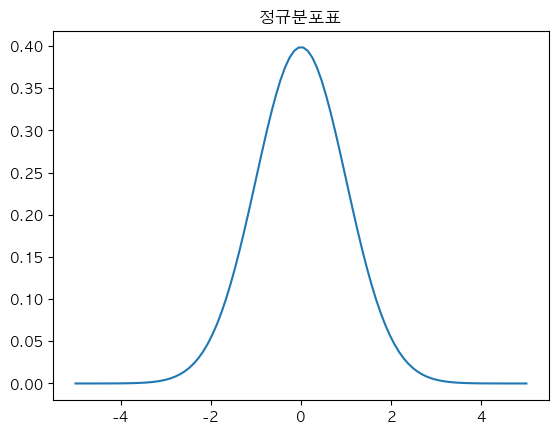

In [12]:
# 평균과 표준 편차가 필요하다.
mu=0
std=1
rv=sp.stats.norm(mu,std)
xx=np.linspace(-5,5,100) # 최소 범위, 최대 범위, 데이터 개수. 샘플데이터 100개를 만듬. 
plt.plot(xx,rv.pdf(xx))
plt.title("정규분포표")
plt.show()

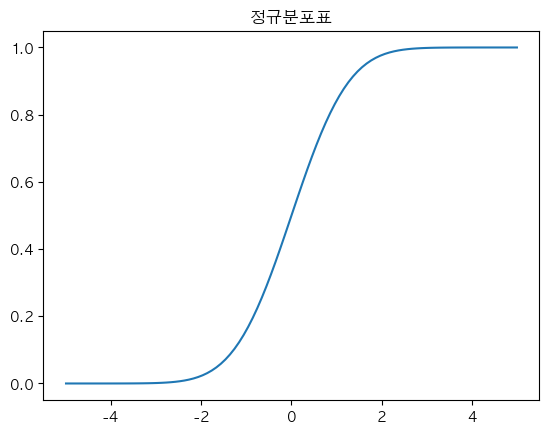

In [15]:
# 샘플링
x=rv.rvs(100)


# 누적 밀도 함수.

xx=np.linspace(-5,5,100) # 최소 범위, 최대 범위, 데이터 개수. 샘플데이터 100개를 만듬. 
plt.plot(xx,rv.cdf(xx))
plt.title("정규분포표")
plt.show()

### 주식의 수익률이 정규 분포를 따르는지 확인

            SPASTT01USM661N  SPASTT01JPM661N  SPASTT01EZM661N  SPASTT01KRM661N
DATE                                                                          
2010-01-01        67.982615        60.272707        76.768190        83.641318
2010-02-01        65.130935        57.755462        72.139322        79.489557
2010-03-01        68.836864        60.433218        76.523839        82.658320
2010-04-01        71.220538        63.633116        78.200478        86.032931
2010-05-01        65.557076        59.225198        70.924049        82.008955
...                     ...              ...              ...              ...
2023-03-01       141.134556       128.075876       125.886332       120.195207
2023-04-01       145.176059       129.985888       129.351345       125.462225
2023-05-01       142.583249       136.608724       128.106966       125.493053
2023-06-01       145.834377       145.422627       127.833060       129.259470
2023-07-01       150.752045       146.420500       1

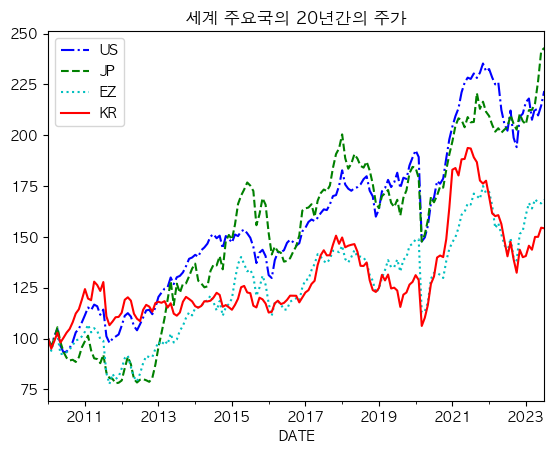

In [26]:
import pandas_datareader.data as web
import datetime

# 날짜 설정
start=datetime.datetime(2023,1,1)
end=datetime.datetime(2023,8,22)


# 가져올 국가의 주가 지수 코드
symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]
data=pd.DataFrame()

for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start='2010-01-01',
                               end=end)[sym]
print(data)

data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100 # 시작 시점의 주가가 100이 되도록 설정함. 

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()



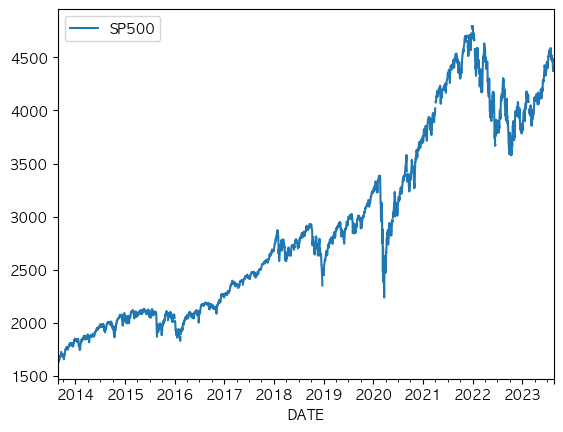

In [43]:
import pandas_datareader.data as web
import datetime

# 날짜 설정
start=datetime.datetime(2023,1,1)
end=datetime.datetime(2023,8,22)


# 나스닥
symbols = "SP500"
data=pd.DataFrame()


data[symbols] = web.DataReader(symbols, data_source='fred', start='2010-01-01',end=end)[symbols]

data.plot()

plt.show()




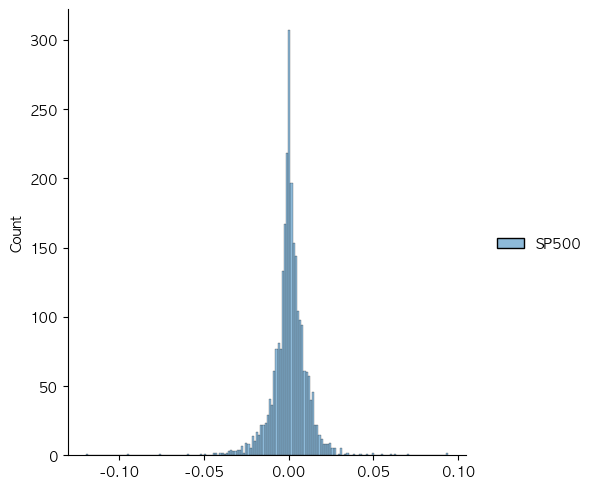

In [44]:
# 일자별 차이
daily_returns=data.pct_change().dropna()

# print(daily_returns)

# 일자별 차이를 그래프로 출력
sns.displot(daily_returns,kde=False)
plt.show()

In [48]:
# 특정 회사 주가 가져오기
import yfinance as yfin

yfin.pdr_override()

samsung=web.get_data_yahoo('005930.KS')
print(samsung)

[*********************100%%**********************]  1 of 1 completed
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2000-01-04   6000.0   6110.0   5660.0   6110.0   4514.579590  74195000
2000-01-05   5800.0   6060.0   5520.0   5580.0   4122.971680  74680000
2000-01-06   5750.0   5780.0   5580.0   5620.0   4152.527344  54390000
2000-01-07   5560.0   5670.0   5360.0   5540.0   4093.416504  40305000
2000-01-10   5600.0   5770.0   5580.0   5770.0   4263.359863  46880000
...             ...      ...      ...      ...           ...       ...
2023-08-17  66300.0  66800.0  66000.0  66700.0  66700.000000  10778652
2023-08-18  66000.0  66700.0  65800.0  66300.0  66300.000000  11745006
2023-08-21  66600.0  67100.0  66300.0  66600.0  66600.000000   9720067
2023-08-22  67200.0  67700.0  66300.0  66600.0  66600.000000  10500242
2023-08-23  66700.0  67100.0  66400.0  66600.0  66600.000000   5343873

[5932 r

## 정규 분포와 로그정규분포 모형 비교

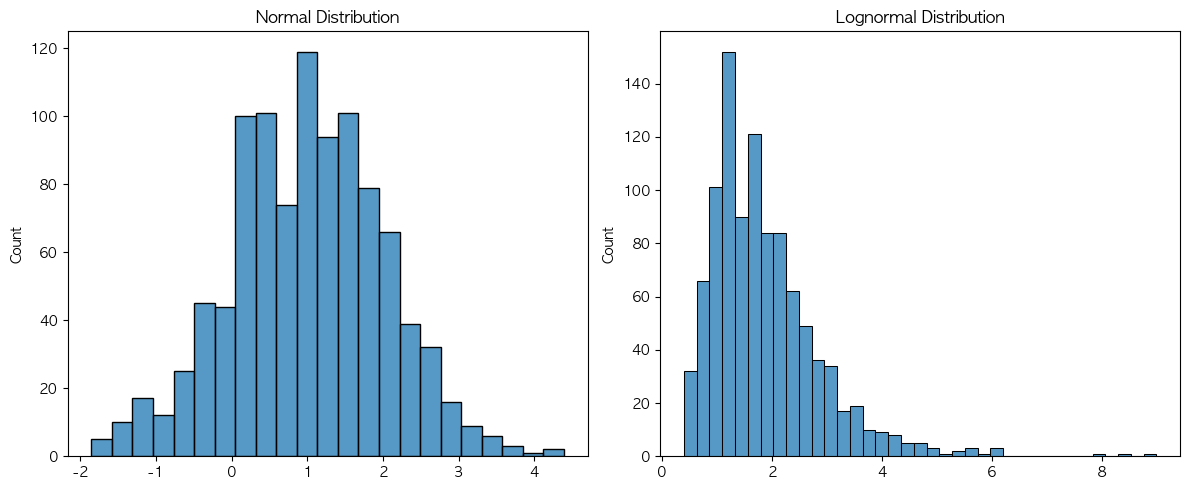

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Set the figsize to adjust the overall width of the figure

sns.histplot(x1, kde=False, ax=ax[0])  # Use histplot instead of displot
sns.histplot(x2, kde=False, ax=ax[1])  # Use histplot instead of displot

ax[0].set_title('Normal Distribution')
ax[1].set_title('Lognormal Distribution')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


### 포아송 분포 확인

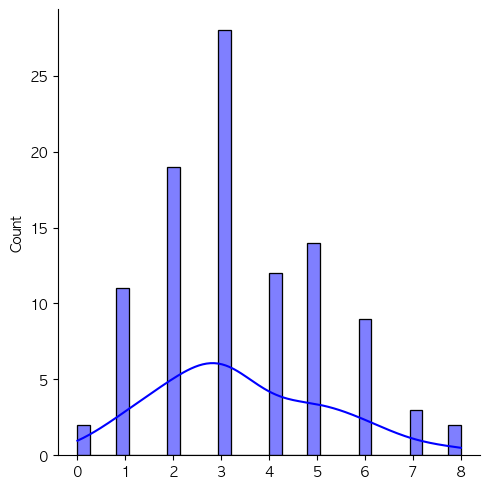

In [59]:
# 포아송 분포
data_poisson=sp.stats.poisson.rvs(mu=3,size=100)

ax=sns.displot(data_poisson,bins=30,color='blue',kde=True)
plt.show()

# 샘플 추출

### 랜덤 함수 사용

In [62]:
import random

# 데이터 집단 
li=[i for i in range(10,51,10)]

# 복원 추출
for i in range(5):
    print(li[random.randint(0,len(li)-1)])
    
# 비복원 추출
result=random.sample(li,k=5)
print(result)


30
40
50
50
30
[10, 40, 30, 20, 50]


In [67]:
ar=['real Madrid','Man utd','man city','Tottenham','arsenal']
print(np.random.choice(ar,3)) # 복원 추출

print(np.random.choice(ar,3,replace=False)) # 비복원 추출 

# 8:2 비복원 추출 - 일반적 머신러닝에서 훈련 데이터와 검증 데이터 분리
sample=np.random.choice(ar,int(len(ar)*0.6),replace=False) # 비복원 추출 

validation_set=[]
for i in ar:
    if i not in sample:
        validation_set.append(i)

print(validation_set)



['arsenal' 'real Madrid' 'Man utd']
['real Madrid' 'arsenal' 'Man utd']
['Tottenham', 'arsenal']


In [68]:
# 가중치를 부여한 샘플 추출 - 층화 추출
# 분류 분석에서 이 속성이 타겟값으로 사용되면 데이터의 개수를 파악한 후 층화추출을 고려해야 한다. 
print(np.random.choice(ar,5,p=[0.1,0.1,0.2,0.2,0.4]))


['man city' 'Man utd' 'arsenal' 'arsenal' 'Tottenham']


### pandas 를 이용한 추출 

In [69]:
help(pd.Series.sample)

Help on function sample in module pandas.core.generic:

sample(self: 'NDFrameT', n: 'int | None' = None, frac: 'float | None' = None, replace: 'bool_t' = False, weights=None, random_state: 'RandomState | None' = None, axis: 'Axis | None' = None, ignore_index: 'bool_t' = False) -> 'NDFrameT'
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled 

In [72]:
# DataFrame 에서 샘플링
ex_df=pd.DataFrame(np.arange(0,120).reshape(40,3))
ex_df.sample()

print(ex_df.sample(frac=0.8))

      0    1    2
25   75   76   77
35  105  106  107
30   90   91   92
18   54   55   56
17   51   52   53
32   96   97   98
23   69   70   71
3     9   10   11
21   63   64   65
12   36   37   38
2     6    7    8
29   87   88   89
0     0    1    2
20   60   61   62
1     3    4    5
5    15   16   17
6    18   19   20
16   48   49   50
34  102  103  104
10   30   31   32
22   66   67   68
7    21   22   23
36  108  109  110
13   39   40   41
37  111  112  113
4    12   13   14
19   57   58   59
11   33   34   35
27   81   82   83
39  117  118  119
15   45   46   47
38  114  115  116


### scikit learn
- model_select 클래스의 train_test_split 함수를이용

In [75]:
X=np.arange(20).reshape(10,2)
print(X)

y=np.arange(10)
print(y)


[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[0 1 2 3 4 5 6 7 8 9]


## 무작위 추출 & 순차 분할

In [77]:
# 순차적 분할 - 데이터를 순서대로 분할 : shuffle 옵션을 False 로 설정
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)
print(X_train.shape)
print(X_test.shape)


(7, 2)
(3, 2)


In [79]:
# 랜덤 추출
# 랜덤 추출을 해서 훈련에 사용할 경우 시드는 고정해야한다. 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)
print(X_train.shape)
print(X_test.shape)


(7, 2)
(3, 2)


## 층화 무작위 추출

In [85]:
X = np.arange(30).reshape(15, 2)
print(X)
print()
y = np.arange(15)
print(y)
print()
# stratum (group)
grp = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(grp)


X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.2,
shuffle=True,
stratify=grp,
random_state=1004)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
X_train shape: (12, 2)
X_test shape: (3, 2)
y_train shape: (12,)
y_test shape: (3,)


## 부트스트랩, 순열검정

In [87]:
# seed 고정
np.random.seed(123)

coffee=pd.read_csv('./data/coffee_dataset.csv')
coffee

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226
...,...,...,...,...
2969,5984,>=21,True,68.544084
2970,5302,<21,True,63.822921
2971,5978,>=21,True,67.298275
2972,3900,<21,False,60.095933


In [89]:
# 200 개의 데이터 샘플링
df_sample=coffee.sample(200)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1732 to 315
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB
